<a href="https://colab.research.google.com/github/josh1593/clrs-solutions/blob/master/Conv%20Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation, Concatenate,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential

In [4]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

In [5]:
os.listdir('./')
os.chdir('sample_data')

In [6]:
with open('train.zip', 'rb') as MyZip:
  print(MyZip.read(4))

b'PK\x03\x04'


In [7]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [7]:
train_dir='train'
images = os.listdir(train_dir)

In [9]:
cats_train_dir = os.path.join(train_dir,'cats')
dogs_train_dir = os.path.join(train_dir,'dogs')

In [9]:
validation_dir='validation'

In [ ]:
validation_dir='validation'
cats_validate_dir = os.path.join(validation_dir,'cats')
dogs_validate_dir = os.path.join(validation_dir,'dogs')

os.makedirs(cats_train_dir, exist_ok=True)
os.makedirs(dogs_train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(cats_validate_dir, exist_ok=True)
os.makedirs(dogs_validate_dir, exist_ok=True)

In [11]:
for image in images[:20000]:
    animal_type = image.split('.')[0]
    source_file = os.path.join(train_dir, image)

    match animal_type:
        case 'cat':
            destination_file = os.path.join(cats_train_dir, image)

        case 'dog':
            destination_file = os.path.join(dogs_train_dir, image)

    os.rename(source_file, destination_file)

In [12]:
for image in images[20000:]:
    animal_type = image.split('.')[0]
    source_file = os.path.join(train_dir, image)

    match animal_type:
        case 'cat':
            destination_file = os.path.join(cats_validate_dir, image)

        case 'dog':
            destination_file = os.path.join(dogs_validate_dir, image)

    os.rename(source_file, destination_file)

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [17]:
input_shape = (256, 256, 3)

inputs = Input(shape=input_shape)

conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
conv2 = Conv2D(32, (5,5), activation='relu', padding='same')(inputs)
conv3 = Conv2D(32, (7,7), activation='relu', padding='same')(inputs)

concatenated1 = Concatenate()([conv1, conv2, conv3])
pooling1 = MaxPooling2D(pool_size=(2,2))(concatenated1)

conv4 = Conv2D(64, (3,3), activation='relu', padding='same')(pooling1)
conv5 = Conv2D(64, (5,5), activation='relu', padding='same')(pooling1)
conv6 = Conv2D(64, (7,7), activation='relu', padding='same')(pooling1)

concatenated2 = Concatenate()([conv4, conv5, conv6])
pooling2 = MaxPooling2D(pool_size=(2,2))(concatenated2)
flatten = Flatten()(pooling2)

dense1 = Dense(256, activation='relu')(flatten)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)
outputs = Dense(1, activation='sigmoid')(dense3)

model = Model(inputs=inputs, outputs=outputs)
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
train_history_adam_1 = model.fit(
    train_generator,
    steps_per_epoch=300,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100
)

Epoch 1/10
300/300 [==============================] - 180s 585ms/step - loss: 0.6886 - accuracy: 0.5838 - val_loss: 0.6053 - val_accuracy: 0.6616
Epoch 2/10
300/300 [==============================] - 175s 582ms/step - loss: 0.6179 - accuracy: 0.6490 - val_loss: 0.6561 - val_accuracy: 0.6259
Epoch 3/10
300/300 [==============================] - 175s 583ms/step - loss: 0.5961 - accuracy: 0.6792 - val_loss: 0.5760 - val_accuracy: 0.6856
Epoch 4/10
300/300 [==============================] - 177s 588ms/step - loss: 0.5757 - accuracy: 0.6963 - val_loss: 0.5152 - val_accuracy: 0.7428
Epoch 5/10
300/300 [==============================] - 176s 587ms/step - loss: 0.5678 - accuracy: 0.7023 - val_loss: 0.5063 - val_accuracy: 0.7469
Epoch 6/10
300/300 [==============================] - 174s 578ms/step - loss: 0.5460 - accuracy: 0.7196 - val_loss: 0.4886 - val_accuracy: 0.7591
Epoch 7/10
300/300 [==============================] - 177s 588ms/step - loss: 0.5345 - accuracy: 0.7249 - val_loss: 0.4870 -

Text(0.5, 0.98, 'Training History with Adam')

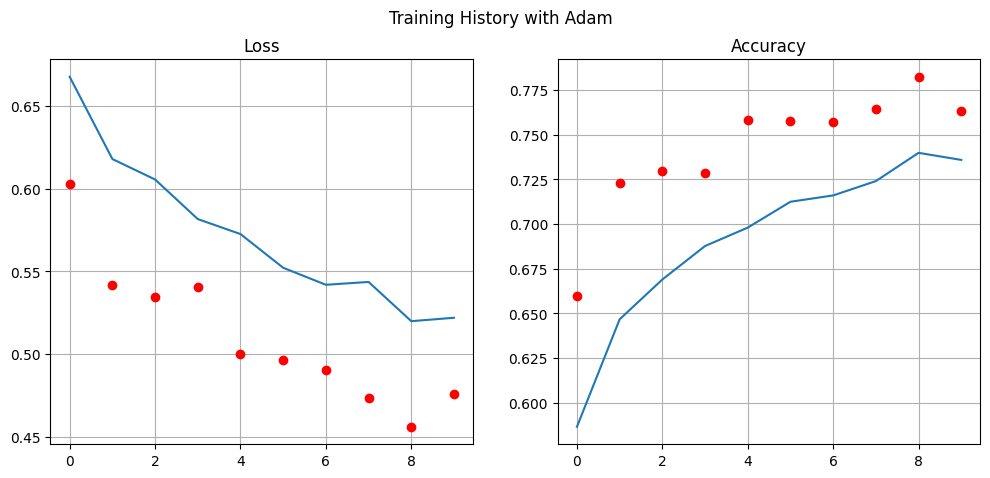

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_history_adam_1.history['loss'])
plt.plot(train_history_adam_1.history['val_loss'], 'ro')
plt.title('Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_history_adam_1.history['accuracy'])
plt.plot(train_history_adam_1.history['val_accuracy'], 'ro')
plt.title('Accuracy')
plt.grid(True)

plt.suptitle('Training History with Adam')

In [19]:
history_df = pd.DataFrame(train_history_adam_1.history)

# Add a column with epoch numbers
history_df['epoch'] = range(1, len(history_df) + 1)

# Print the table with epoch, loss, and validation loss
print("Training Loss and Validation Loss:")
print(history_df[['epoch', 'loss', 'val_loss']])

Training Loss and Validation Loss:
   epoch      loss  val_loss
0      1  0.667482  0.602799
1      2  0.617813  0.541864
2      3  0.605455  0.534452
3      4  0.581555  0.540519
4      5  0.572500  0.500372
5      6  0.552156  0.496268
6      7  0.541882  0.490447
7      8  0.543596  0.473812
8      9  0.519906  0.456139
9     10  0.521970  0.475819


In [22]:
input_shape = (256, 256, 3)

inputs = Input(shape=input_shape)

conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
conv2 = Conv2D(32, (5,5), activation='relu', padding='same')(inputs)
conv3 = Conv2D(32, (7,7), activation='relu', padding='same')(inputs)

concatenated1 = Concatenate()([conv1, conv2, conv3])
pooling1 = MaxPooling2D(pool_size=(2,2))(concatenated1)

conv4 = Conv2D(64, (3,3), activation='relu', padding='same')(pooling1)
conv5 = Conv2D(64, (5,5), activation='relu', padding='same')(pooling1)
conv6 = Conv2D(64, (7,7), activation='relu', padding='same')(pooling1)

concatenated2 = Concatenate()([conv4, conv5, conv6])
pooling2 = MaxPooling2D(pool_size=(2,2))(concatenated2)
flatten = Flatten()(pooling2)

dense1 = Dense(256, activation='relu')(flatten)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)
outputs = Dense(1, activation='sigmoid')(dense3)

model = Model(inputs=inputs, outputs=outputs)
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
train_history_rms_1 = model.fit(
    train_generator,
    batch_size=32,
    steps_per_epoch=300,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100
)

Epoch 1/10
300/300 [==============================] - 175s 576ms/step - loss: 0.6988 - accuracy: 0.5667 - val_loss: 0.6313 - val_accuracy: 0.6087
Epoch 2/10
300/300 [==============================] - 174s 581ms/step - loss: 0.6425 - accuracy: 0.6205 - val_loss: 0.5916 - val_accuracy: 0.6694
Epoch 3/10
300/300 [==============================] - 173s 574ms/step - loss: 0.6150 - accuracy: 0.6602 - val_loss: 0.5642 - val_accuracy: 0.7025
Epoch 4/10
300/300 [==============================] - 172s 574ms/step - loss: 0.5984 - accuracy: 0.6734 - val_loss: 0.5468 - val_accuracy: 0.7047
Epoch 5/10
300/300 [==============================] - 175s 584ms/step - loss: 0.5837 - accuracy: 0.6890 - val_loss: 0.5139 - val_accuracy: 0.7444
Epoch 6/10
300/300 [==============================] - 175s 582ms/step - loss: 0.5727 - accuracy: 0.6947 - val_loss: 0.5069 - val_accuracy: 0.7419
Epoch 7/10
300/300 [==============================] - 174s 579ms/step - loss: 0.5639 - accuracy: 0.7042 - val_loss: 0.5087 -

Text(0.5, 0.98, 'Training History with RMSProp')

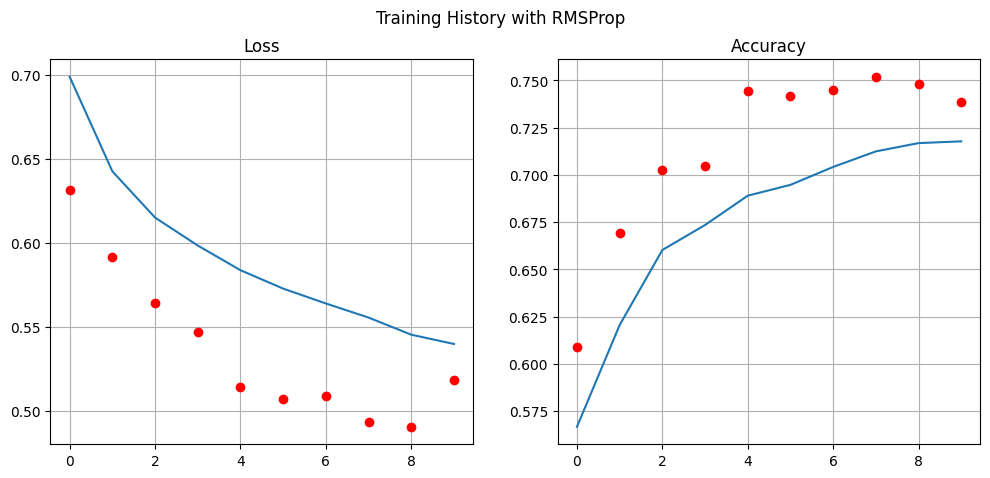

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_history_rms_1.history['loss'])
plt.plot(train_history_rms_1.history['val_loss'], 'ro')
plt.title('Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_history_rms_1.history['accuracy'])
plt.plot(train_history_rms_1.history['val_accuracy'], 'ro')
plt.title('Accuracy')
plt.grid(True)

plt.suptitle('Training History with RMSProp')

In [28]:
input_shape = (256, 256, 3)

inputs = Input(shape=input_shape)

conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
conv2 = Conv2D(32, (5,5), activation='relu', padding='same')(inputs)
conv3 = Conv2D(32, (7,7), activation='relu', padding='same')(inputs)

concatenated1 = Concatenate()([conv1, conv2, conv3])
pooling1 = MaxPooling2D(pool_size=(2,2))(concatenated1)

conv4 = Conv2D(64, (3,3), activation='relu', padding='same')(pooling1)
conv5 = Conv2D(64, (5,5), activation='relu', padding='same')(pooling1)
conv6 = Conv2D(64, (7,7), activation='relu', padding='same')(pooling1)

concatenated2 = Concatenate()([conv4, conv5, conv6])
pooling2 = MaxPooling2D(pool_size=(2,2))(concatenated2)
flatten = Flatten()(pooling2)

dense1 = Dense(256, activation='relu')(flatten)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)
outputs = Dense(1, activation='sigmoid')(dense3)

model = Model(inputs=inputs, outputs=outputs)
from keras.optimizers import Adagrad
model.compile(optimizer=Adagrad(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
train_history_ada_1 = model.fit(
    train_generator,
    batch_size=32,
    steps_per_epoch=300,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100
)

Epoch 1/10
300/300 [==============================] - 174s 571ms/step - loss: 0.6896 - accuracy: 0.5337 - val_loss: 0.6895 - val_accuracy: 0.5294
Epoch 2/10
300/300 [==============================] - 173s 577ms/step - loss: 0.6820 - accuracy: 0.5567 - val_loss: 0.6729 - val_accuracy: 0.5747
Epoch 3/10
300/300 [==============================] - 175s 583ms/step - loss: 0.6731 - accuracy: 0.5754 - val_loss: 0.6675 - val_accuracy: 0.5819
Epoch 4/10
300/300 [==============================] - 175s 583ms/step - loss: 0.6668 - accuracy: 0.5919 - val_loss: 0.6479 - val_accuracy: 0.6109
Epoch 5/10
300/300 [==============================] - 173s 578ms/step - loss: 0.6597 - accuracy: 0.6023 - val_loss: 0.6419 - val_accuracy: 0.6244
Epoch 6/10
300/300 [==============================] - 174s 582ms/step - loss: 0.6542 - accuracy: 0.6075 - val_loss: 0.6337 - val_accuracy: 0.6475
Epoch 7/10
300/300 [==============================] - 174s 579ms/step - loss: 0.6502 - accuracy: 0.6136 - val_loss: 0.6307 -

Text(0.5, 0.98, 'Training History with Adagrad')

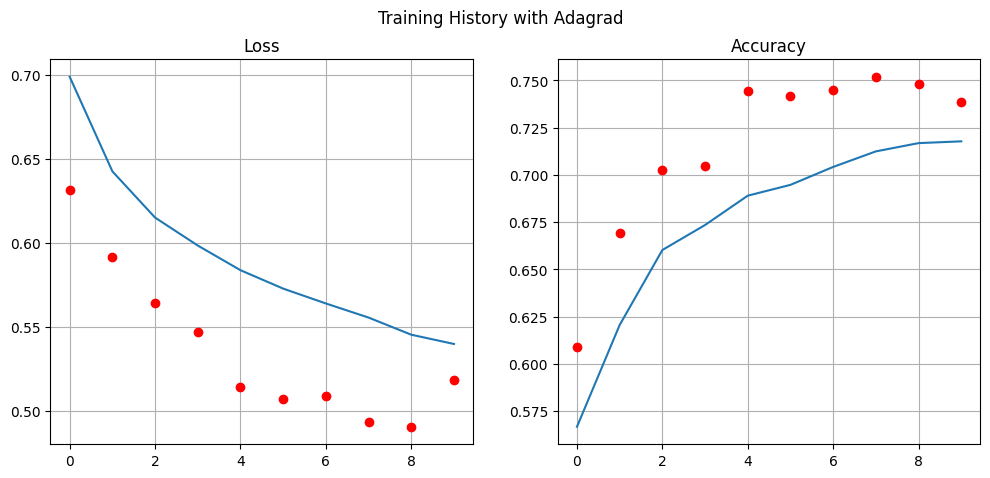

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_history_rms_1.history['loss'])
plt.plot(train_history_rms_1.history['val_loss'], 'ro')
plt.title('Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_history_rms_1.history['accuracy'])
plt.plot(train_history_rms_1.history['val_accuracy'], 'ro')
plt.title('Accuracy')
plt.grid(True)

plt.suptitle('Training History with Adagrad')

In [13]:
input_shape = (256, 256, 3)

inputs = Input(shape=input_shape)

conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
conv2 = Conv2D(32, (5,5), activation='relu', padding='same')(inputs)
conv3 = Conv2D(32, (7,7), activation='relu', padding='same')(inputs)

concatenated1 = Concatenate()([conv1, conv2, conv3])
pooling1 = MaxPooling2D(pool_size=(2,2))(concatenated1)

conv4 = Conv2D(64, (3,3), activation='relu', padding='same')(pooling1)
conv5 = Conv2D(64, (5,5), activation='relu', padding='same')(pooling1)
conv6 = Conv2D(64, (7,7), activation='relu', padding='same')(pooling1)

concatenated2 = Concatenate()([conv4, conv5, conv6])
pooling2 = MaxPooling2D(pool_size=(2,2))(concatenated2)
flatten = Flatten()(pooling2)

dense1 = Dense(256, activation='relu')(flatten)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)
outputs = Dense(1, activation='sigmoid')(dense3)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 256, 256, 32)         896       ['input_2[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 256, 256, 32)         2432      ['input_2[0][0]']             
                                                                                                  
 conv2d_8 (Conv2D)           (None, 256, 256, 32)         4736      ['input_2[0][0]']             
                                                                                            

In [14]:
train_history = model.fit(
    train_generator,
    steps_per_epoch=300,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100
)


Epoch 1/10
300/300 [==============================] - 178s 587ms/step - loss: 0.6884 - accuracy: 0.5434 - val_loss: 0.6884 - val_accuracy: 0.5322
Epoch 2/10
300/300 [==============================] - 175s 582ms/step - loss: 0.6707 - accuracy: 0.5796 - val_loss: 0.6473 - val_accuracy: 0.6022
Epoch 3/10
300/300 [==============================] - 176s 586ms/step - loss: 0.6524 - accuracy: 0.6041 - val_loss: 0.6318 - val_accuracy: 0.6184
Epoch 4/10
300/300 [==============================] - 176s 588ms/step - loss: 0.6417 - accuracy: 0.6193 - val_loss: 0.6101 - val_accuracy: 0.6594
Epoch 5/10
300/300 [==============================] - 174s 579ms/step - loss: 0.6320 - accuracy: 0.6396 - val_loss: 0.6043 - val_accuracy: 0.6566
Epoch 6/10
300/300 [==============================] - 173s 578ms/step - loss: 0.6211 - accuracy: 0.6450 - val_loss: 0.5822 - val_accuracy: 0.6938
Epoch 7/10
300/300 [==============================] - 174s 580ms/step - loss: 0.6185 - accuracy: 0.6507 - val_loss: 0.5940 -

Text(0.5, 0.98, 'Training History with Momentum')

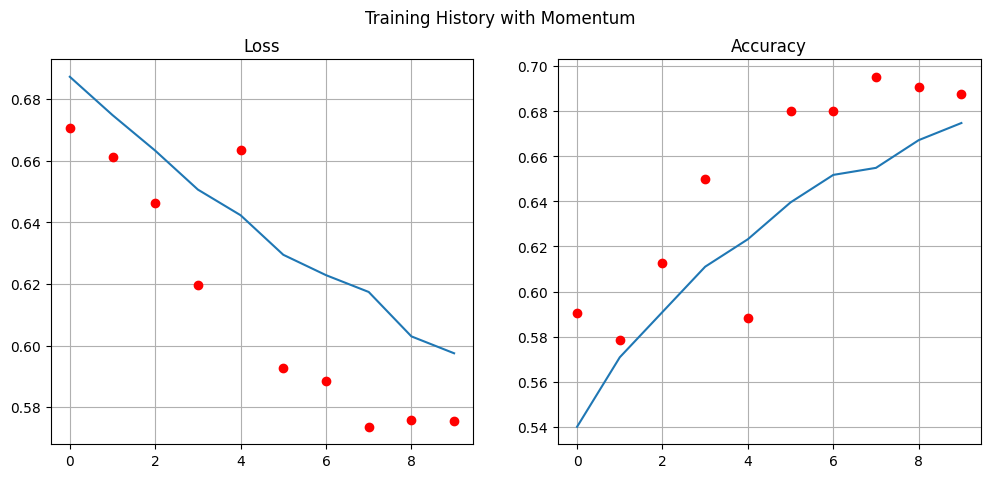

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'], 'ro')
plt.title('Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'], 'ro')
plt.title('Accuracy')
plt.grid(True)

plt.suptitle('Training History with Momentum')

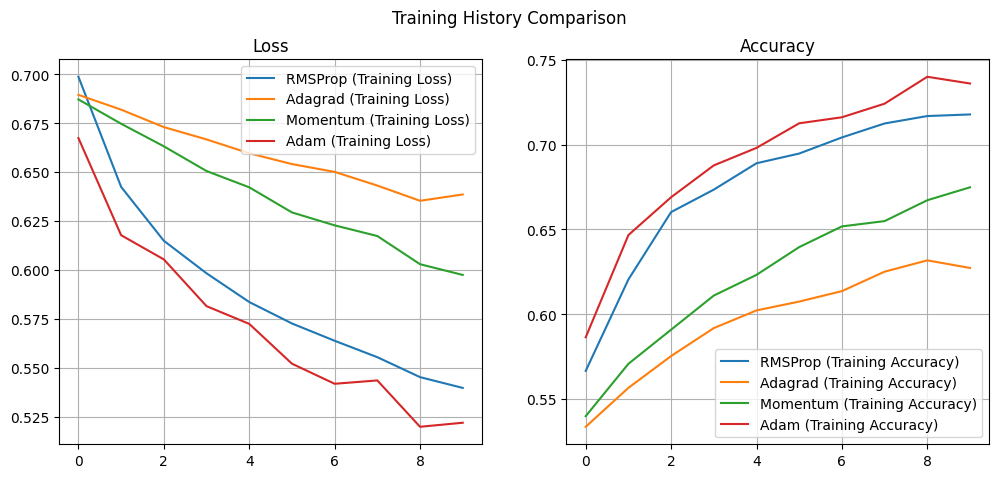

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(train_history_rms_1.history['loss'], label='RMSProp (Training Loss)')
plt.plot(train_history_ada_1.history['loss'], label='Adagrad (Training Loss)')
plt.plot(train_history.history['loss'], label='Momentum (Training Loss)')
plt.plot(train_history_adam_1.history['loss'], label='Adam (Training Loss)')
plt.title('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_history_rms_1.history['accuracy'], label='RMSProp (Training Accuracy)')
plt.plot(train_history_ada_1.history['accuracy'], label='Adagrad (Training Accuracy)')
plt.plot(train_history.history['accuracy'], label='Momentum (Training Accuracy)')
plt.plot(train_history_adam_1.history['accuracy'], label='Adam (Training Accuracy)')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Training History Comparison')
plt.show()

In [42]:
import pandas as pd

# Create a list of training histories
histories = [train_history_rms_1.history, train_history_ada_1.history,
             train_history.history, train_history_adam_1.history]

# Create a list of model names
model_names = ['RMSProp', 'Adagrad', 'Momentum', 'Adam']

# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the histories and model names
for history, name in zip(histories, model_names):
    # Create a DataFrame from the history dictionary
    df = pd.DataFrame.from_dict(history, orient='columns')

    # Add a column for the model name
    df['model'] = name

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Print the combined DataFrame
print(combined_df)

        loss  accuracy  val_loss  val_accuracy     model
0   0.698799  0.566667  0.631317      0.608750   RMSProp
1   0.642505  0.620521  0.591596      0.669375   RMSProp
2   0.614982  0.660208  0.564244      0.702500   RMSProp
3   0.598351  0.673437  0.546787      0.704687   RMSProp
4   0.583674  0.688958  0.513922      0.744375   RMSProp
5   0.572713  0.694687  0.506895      0.741875   RMSProp
6   0.563867  0.704167  0.508667      0.744687   RMSProp
7   0.555474  0.712396  0.493283      0.751875   RMSProp
8   0.545283  0.716771  0.490481      0.748125   RMSProp
9   0.539768  0.717708  0.518261      0.738750   RMSProp
10  0.689557  0.533750  0.689529      0.529375   Adagrad
11  0.681993  0.556667  0.672928      0.574687   Adagrad
12  0.673079  0.575417  0.667533      0.581875   Adagrad
13  0.666776  0.591875  0.647922      0.610937   Adagrad
14  0.659703  0.602292  0.641924      0.624375   Adagrad
15  0.654176  0.607500  0.633654      0.647500   Adagrad
16  0.650189  0.613646  0.63072

In [43]:
import pandas as pd

# Create lists to store the values
epochs = list(range(1, len(train_history_rms_1.history['loss']) + 1))
rms_loss = train_history_rms_1.history['loss']
rms_acc = train_history_rms_1.history['accuracy']
ada_loss = train_history_ada_1.history['loss']
ada_acc = train_history_ada_1.history['accuracy']
mom_loss = train_history.history['loss']
mom_acc = train_history.history['accuracy']
adam_loss = train_history_adam_1.history['loss']
adam_acc = train_history_adam_1.history['accuracy']

# Create the DataFrame
data = {
    'epoch': epochs,
    'RMSProp_loss': rms_loss,
    'RMSProp_acc': rms_acc,
    'Adagrad_loss': ada_loss,
    'Adagrad_acc': ada_acc,
    'Momentum_loss': mom_loss,
    'Momentum_acc': mom_acc,
    'Adam_loss': adam_loss,
    'Adam_acc': adam_acc
}
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

   epoch  RMSProp_loss  RMSProp_acc  Adagrad_loss  Adagrad_acc  Momentum_loss  \
0      1      0.698799     0.566667      0.689557     0.533750       0.687222   
1      2      0.642505     0.620521      0.681993     0.556667       0.674791   
2      3      0.614982     0.660208      0.673079     0.575417       0.663259   
3      4      0.598351     0.673437      0.666776     0.591875       0.650619   
4      5      0.583674     0.688958      0.659703     0.602292       0.642300   
5      6      0.572713     0.694687      0.654176     0.607500       0.629468   
6      7      0.563867     0.704167      0.650189     0.613646       0.622863   
7      8      0.555474     0.712396      0.643196     0.625104       0.617409   
8      9      0.545283     0.716771      0.635417     0.631771       0.602997   
9     10      0.539768     0.717708      0.638652     0.627292       0.597519   

   Momentum_acc  Adam_loss  Adam_acc  
0      0.540000   0.667482  0.586458  
1      0.570833   0.617813  0.